In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(figsize=(8, 9))
# ax.set_xscale("log") #distances are order of 1,000s of light years

# Load the planets dataset
#planets = pd.read_csv('planets.csv', sep=',')
#planets1 = pd.read_csv('planets1.csv')
# Plot the orbital period with horizontal boxes
#sns.boxplot(x="pl_bmassj", y="pl_discmethod", data=planets1,
#            whis="range", palette="vlag")

# Add in points to show each observation
# sns.swarmplot(x="pl_bmassj", y="pl_discmethod", data=planets1,
#               size=2, color=".3", linewidth=0)

# # Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True);


<Figure size 432x288 with 0 Axes>

In [84]:
#planets = pd.read_csv('planets1.csv')

In [85]:
planets.shape

(3516, 68)

In [86]:
data = pd.read_excel('planet_list.xlsx')

In [87]:
data.shape

(4135, 105)

In [88]:
data.head(1)

,fpl_hostname,fpl_letter,fpl_name,fpl_discmethod,fpl_controvflag,fpl_disc,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_orbperlim,...,fst_meterr1,fst_meterr2,fst_metlim,fst_metratio,fst_metreflink,fst_age,fst_ageerr1,fst_ageerr2,fst_agelim,fst_agereflink
0,11 Com,b,11 Com b,Radial Velocity,0,2007,326.03,0.32,-0.32,0.0,...,0.09,-0.09,0.0,[Fe/H],<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,NaN,NaN,NaN,NaN,NaN


In [89]:
data.rename(columns={"fpl_bmasse": "Planet Mass [Earth mass]",
                     "fpl_rade": "Planet Radius [Earth radii]",
                     "fpl_discmethod":"Discovery Method",
                     "fpl_orbper": "Orbital Period [days]",
                     "fpl_smax" : "Semi-Major Axis - [au]"
                    }, inplace = True)

In [90]:
data['Orbital Period [yrs]'] = data['Orbital Period [days]']/365

In [91]:
# decade = 10*(planets['year'] // 10)
# decade = decade.astype(str) + 's'
# decade.name = 'decade'
# planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

In [92]:
data['fpl_radelim'].isnull().value_counts()

False    4123
True       12
Name: fpl_radelim, dtype: int64

In [94]:
plot_data = data[["Planet Mass [Earth mass]",
                  "Discovery Method",
                  "Orbital Period [yrs]",
                  "Semi-Major Axis - [au]"]]

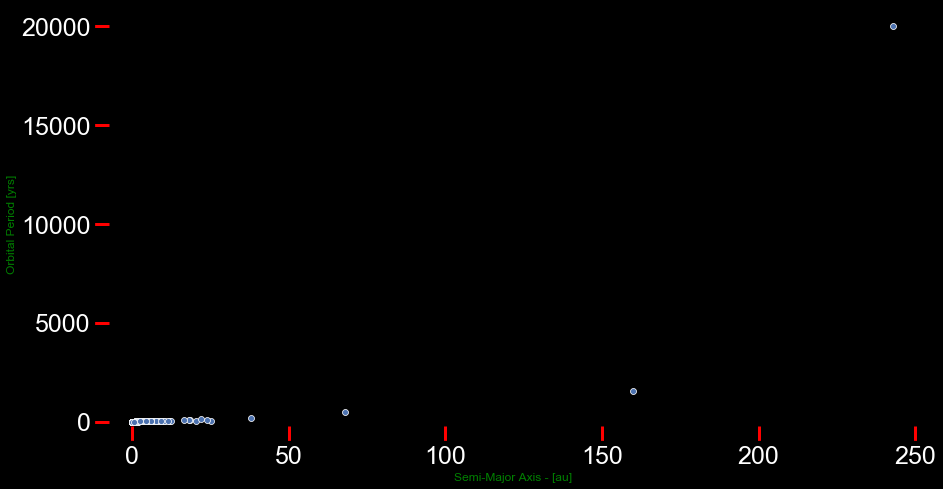

In [103]:
x = plot_data['Semi-Major Axis - [au]']
y = plot_data['Orbital Period [yrs]']

fig, ax = plt.subplots(figsize=(15,8))

w = 'white'
b = 'black'
ax.set_facecolor(b)
plt.tick_params(direction='in', axis='both',color='red', width=3, length=15, grid_linewidth=4)
plt.rc_context({'axes.edgecolor':b,
                'xtick.color':w,
                'ytick.color':w,
                'figure.facecolor':b,
                'xtick.labelsize': 25,
                'ytick.labelsize': 25,
                'text.color': w,
                'axes.labelcolor':'green'})

ax = sns.scatterplot(x=x, y= y,
                    
                      palette="Set1",
                      data=plot_data,
                      ); 
# ax.set_xscale("log", nonposx='clip')
# ax.set_yscale("log", nonposy='clip')

In [31]:
methods_to_plot = list(plot_data['Discovery Method'].value_counts()[0:4].index)
methods_to_plot

['Transit', 'Radial Velocity', 'Microlensing', 'Imaging']

In [32]:
plot_data = plot_data[plot_data['Discovery Method'].isin(methods_to_plot)]

"Planet Mass [Earth mass]"
"Planet Radius [Earth radii]"
"Discovery Method"
"Orbital Period [days]"

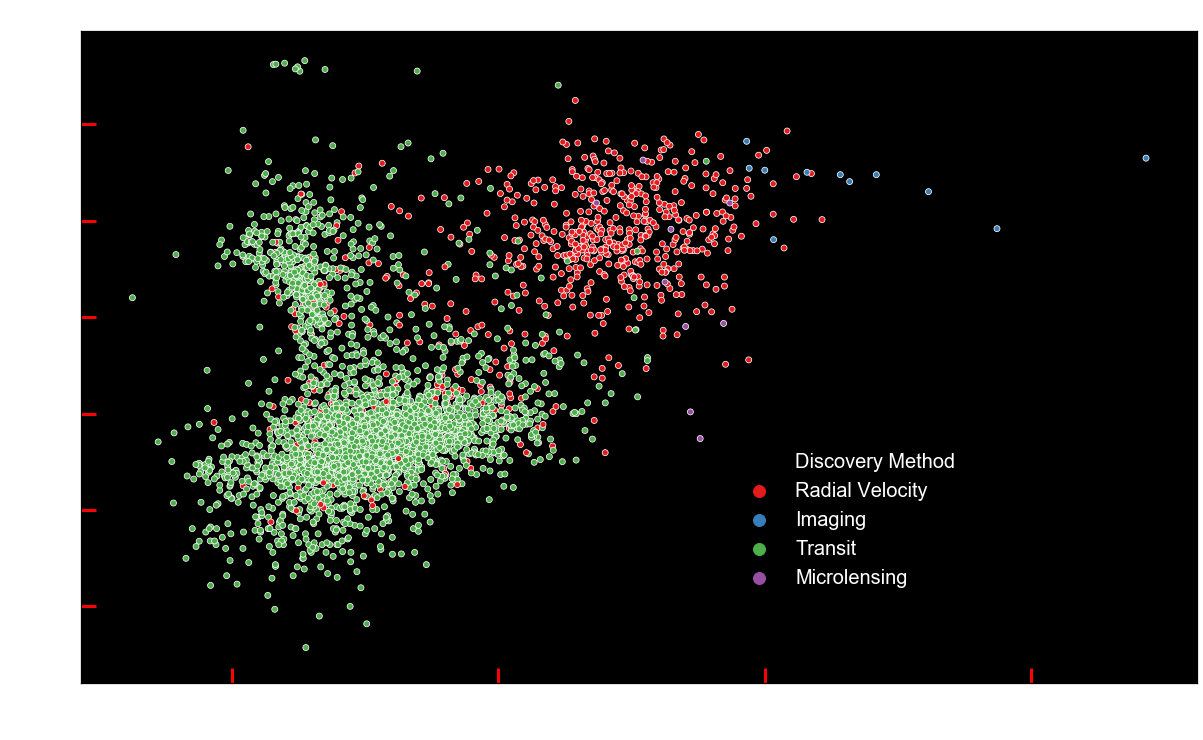

In [40]:
from matplotlib.ticker import EngFormatter
fig, ax = plt.subplots(figsize=(20,12))


#Plot colors setup
w = 'white'
b = 'black'
ax.set_facecolor(b)
plt.tick_params(direction='in', axis='both',color='red', width=3, length=15, grid_linewidth=4)
plt.rc_context({'axes.edgecolor':b,
                'xtick.color':w,
                'ytick.color':w,
                'figure.facecolor':b,
                'xtick.labelsize': 25,
                'ytick.labelsize': 25,
                'text.color': w,
                'axes.labelcolor':'green'})



ax = sns.scatterplot(x='Orbital Period [days]', y='Planet Mass [Earth mass]',
                      hue=plot_data["Discovery Method"],
                      #size="Planet Mass [Earth mass]",
                      #style = "Discovery Method",
                      palette="Set1",
                      data=plot_data,
                      );

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title('Planetary Mass vs Orbital Period ("Confirmed")',
             #color=w,
             fontsize=25,
             fontweight='bold')

formatter0 = EngFormatter(unit='Days')
ax.xaxis.set_major_formatter(formatter0)

ax.set_xlabel('Period (Days)',c=w,fontweight='bold',fontsize=20)
ax.set_ylabel("Planet Mass [Earth mass]", fontweight='bold',color=w,fontsize=20)

#seaborn.set(color_codes=True)
ax.legend(loc='center right',
          facecolor=b,
          edgecolor='inherit',
          fontsize=20,
          markerscale=2,
          fancybox=True,
          title_fontsize=25,
          bbox_to_anchor=(.80, 0.25),
          );



In [34]:
from matplotlib import ticker
import matplotlib.ticker as tick
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns
import numpy as np

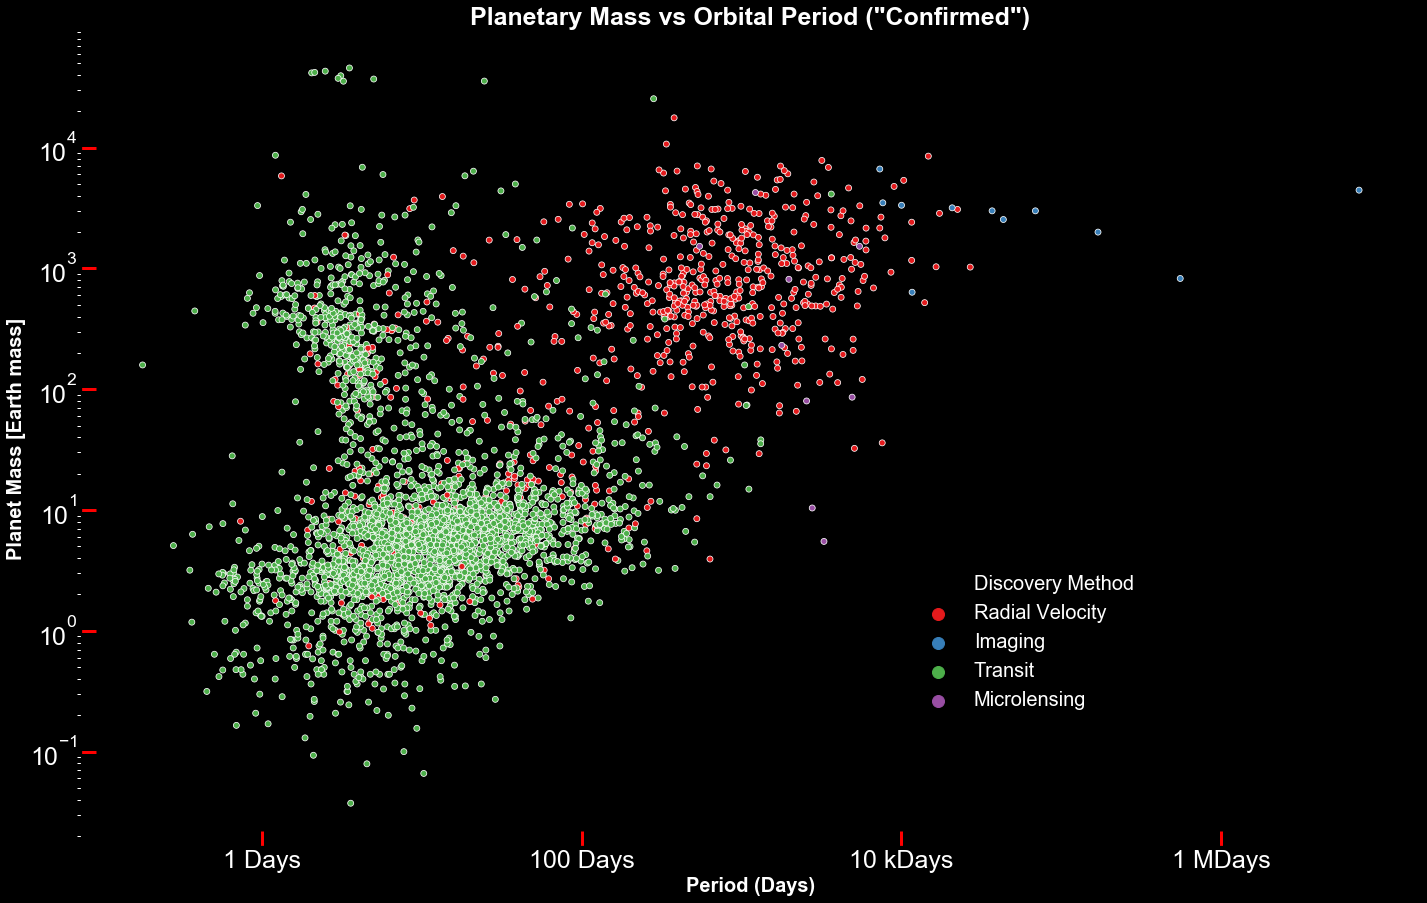

In [43]:
from matplotlib import ticker
import matplotlib.ticker as tick
from matplotlib.ticker import EngFormatter,FuncFormatter#,ScalarFormatter

fig, ax1 = plt.subplots()

ax1.grid(b='none',ms= 12, mfcalt = 'white') 

#Plot colors setup
w = 'white'
b = 'black'
ax1.set_facecolor(b)
plt.tick_params(direction='in', axis='both',color='red', width=3, length=15, grid_linewidth=4)
plt.rc_context({'axes.edgecolor':b,
                'xtick.color':w,
                'ytick.color':w,
                'figure.facecolor':b,
                'xtick.labelsize': 25,
                'ytick.labelsize': 25,
                })



fig.set_size_inches(24, 15)
ax1 = sns.scatterplot(x='Orbital Period [days]', y='Planet Mass [Earth mass]',
                      hue=plot_data["Discovery Method"],
                      #size="Planet Mass [Earth mass]",
                      #style = "Discovery Method",
                      palette="Set1",
                      data=plot_data,
                      );

ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')

ax1.set_title('Planetary Mass vs Orbital Period ("Confirmed")',
             color=w,
             fontsize=25,
             fontweight='bold')

formatter_x = EngFormatter(unit='Days')
#formatter_y = tick.FuncFormatter(reformat_large_tick_values)

ax1.xaxis.set_major_formatter(formatter_x)
#ax1.yaxis.set_major_formatter(formatter_y);

ax1.set_xlabel('Period (Days)',c=w,fontweight='bold',fontsize=20)
ax1.set_ylabel("Planet Mass [Earth mass]", fontweight='bold',color=w,fontsize=20)


#seaborn.set(color_codes=True)
ax1.legend(loc='center right',
          facecolor=b,
          edgecolor='inherit',
          fontsize=20,
          markerscale=2,
          fancybox=True,
          title_fontsize=25,
          bbox_to_anchor=(.80, 0.25),
          );
ax1.labelcolor = w


ax1.grid(False)
